In [1]:
#!pip install cufflinks
#!pip install chart_studio
!pip install tensorflow --upgrade

In [23]:
#Dataframe
import pandas as pd
import numpy as np
from numpy import sqrt
import math
#matplotlib
import matplotlib.pyplot  as plt
#Plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot


In [ ]:
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#Computation
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:

#deep-learning models
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout


In [ ]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install yfinance 
import yfinance as yf

In [17]:
df = yf.download("^NSEI",start="2022-01-01", end="2023-01-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900


In [18]:
nifty_50_df = df.fillna(method='ffill')
nifty_50_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900


In [19]:
nifty_50_df['SMA50'] = nifty_50_df['Close'].rolling(50).mean()
nifty_50_df

,Open,High,Low,Close,Adj Close,Volume,SMA50
Date,,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,NaN
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,NaN
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,NaN
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,NaN
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,NaN
...,...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,18200.374961
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300,18219.306992
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900,18235.520977


In [20]:
nifty_50_df['SMA50'] = nifty_50_df['Close'].rolling(50).mean()

In [21]:
nifty_50_df.dropna(inplace=True)
nifty_50_df

,Open,High,Low,Close,Adj Close,Volume,SMA50
Date,,,,,,,
2022-03-15,16900.650391,16927.750000,16555.000000,16663.000000,16663.000000,381600,17285.243984
2022-03-16,16876.650391,16987.900391,16837.849609,16975.349609,16975.349609,260000,17272.236992
2022-03-17,17202.900391,17344.599609,17175.750000,17287.050781,17287.050781,448300,17261.873008
2022-03-21,17329.500000,17353.349609,17096.400391,17117.599609,17117.599609,285500,17245.720000
2022-03-22,17120.400391,17334.400391,17006.300781,17315.500000,17315.500000,338300,17237.111992
...,...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,18200.374961
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300,18219.306992
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900,18235.520977


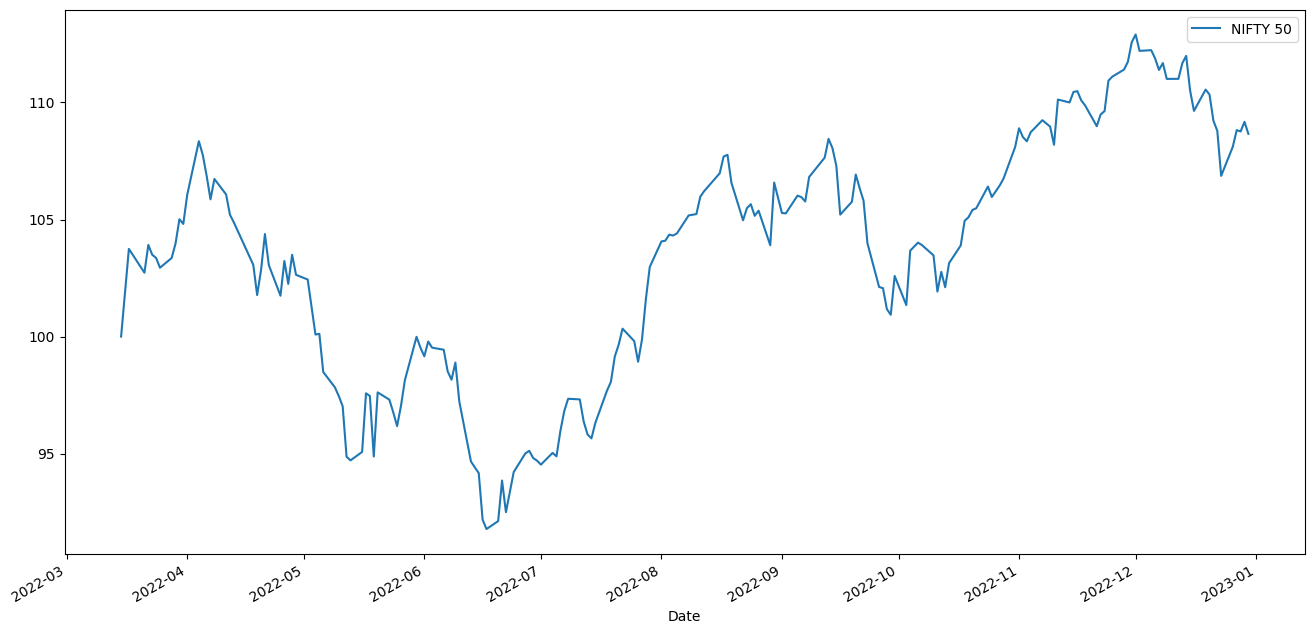

In [24]:
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_50_df.plot(figsize=(16, 8))
plt.legend(['NIFTY 50'])
plt.show()

<AxesSubplot: xlabel='Date'>

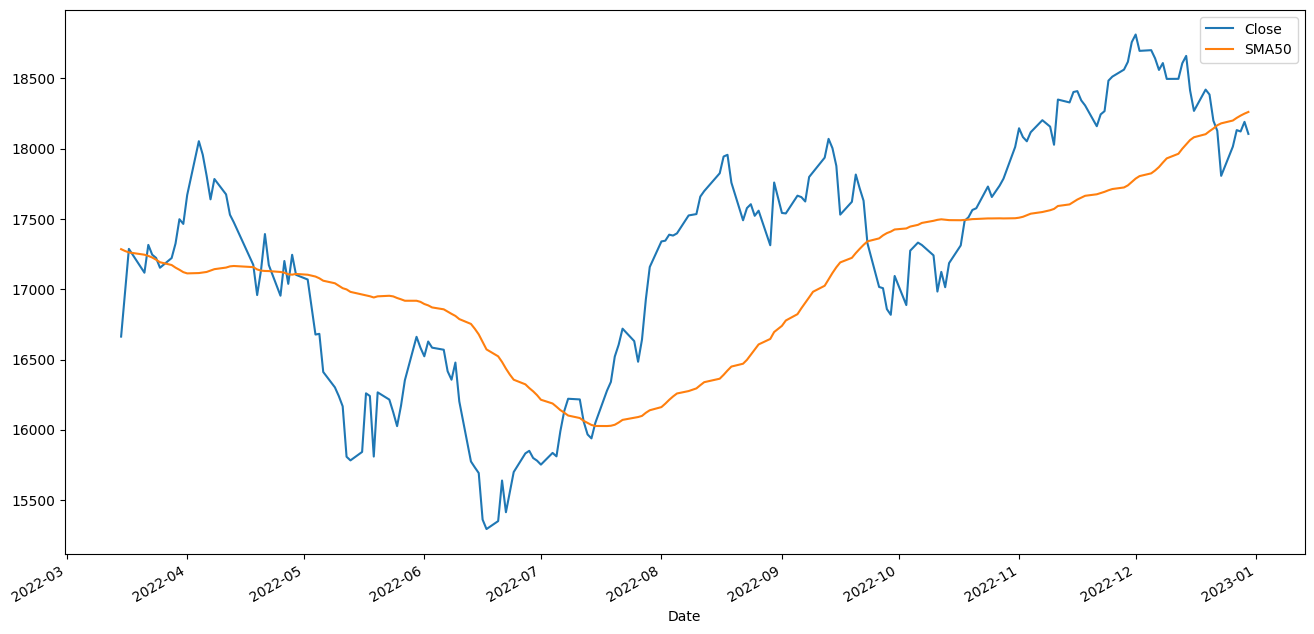

In [25]:
# plotting Close price and simple
# moving average of 50 days using .plot() method
nifty_50_df[['Close', 'SMA50']].plot(label='NIFTY50',
                                  figsize=(16, 8))

In [26]:
#X = nifty_50_df.drop(["Close","Adj Close", "Volume", "High", "Low", "SMA50"],axis=1)
#y = nifty_50_df["Close"]
#Creating a new dataframe with only the close column
data = nifty_50_df.filter(['Close'])
#I converted the dataframe into a numpy array
dataset = data.values
# Getting the number of rows to train the model on
training_data_len =math.ceil(len(dataset) * .8)
training_data_len

160

In [29]:
#scaling the data, to a py preprocessing  tranformations 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(199, 1)

In [30]:
# Creating training dataset
train_data = scaled_data[0:training_data_len, :]

# spliting data into x and y 
x_train = []
y_train = []
for i in range (80, len(train_data)):
  x_train.append(train_data[i-80:i, 0])
  y_train.append(train_data[i, 0])
  if i<=85:
    print(x_train)
    print(y_train)
    print()

[array([0.38917306, 0.47793396, 0.56651059, 0.51835738, 0.57459506,
       0.55474578, 0.54823814, 0.52841716, 0.54802501, 0.57738016,
       0.62652742, 0.61700767, 0.67546156, 0.78428542, 0.75700494,
       0.71445024, 0.6666811 , 0.70782882, 0.67674033, 0.63563535,
       0.62010525, 0.53428542, 0.47318852, 0.52374276, 0.59650458,
       0.53380199, 0.47185258, 0.54200079, 0.49585121, 0.55457539,
       0.51408093, 0.50457505, 0.39332186, 0.39475714, 0.31763285,
       0.28654436, 0.26898261, 0.24825223, 0.14620631, 0.13886058,
       0.15595334, 0.27445291, 0.26905365, 0.14660426, 0.27639966,
       0.26177897, 0.23633146, 0.20809884, 0.24911918, 0.30092361,
       0.3887185 , 0.36688002, 0.34931799, 0.37922705, 0.36680897,
       0.36261744, 0.31908201, 0.30200341, 0.33662961, 0.25811304,
       0.13665825, 0.12463757, 0.11328514, 0.01906781, 0.        ,
       0.01609843, 0.09812441, 0.03404371, 0.07477988, 0.11530264,
       0.15304058, 0.15819841, 0.14367707, 0.13832055, 0.1303

In [31]:
# Converting the dataset into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#making the data traineable
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 1 is just the number of features that is the closing price. 
x_train.shape

(80, 80, 1)

In [32]:
#creating testing dataset
#scales values from 2168 to 2497
test_data= scaled_data[training_data_len -80: , :]
#x_test and y_test
x_test =[]
y_test = dataset [training_data_len:, :]
for i in range (80, len (test_data)):
  x_test.append(test_data[i-80:i, 0])

In [33]:
#converting test data to a numpy array
x_test=np.array(x_test) #so we can predict using LSTM model

#reshaping data from 2D to 3D for LSTM 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [34]:
# Building the model
model = Sequential()
model.add(LSTM(4, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

In [ ]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

In [ ]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [ ]:
# the actual values  and predicted prices
test

In [ ]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [ ]:
# Building the model
model = Sequential()
model.add(LSTM(4, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(4, return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

In [ ]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

In [ ]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

In [ ]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [ ]:
# the actual values  and predicted prices
test

In [ ]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [ ]:
# Building the model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(8, return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

In [ ]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)


In [ ]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


In [ ]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

In [ ]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [ ]:
# the actual values  and predicted prices
test

In [ ]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [ ]:
# Building the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.summary()

In [ ]:
#compiling model
model.compile(optimizer='rmsprop', loss='mean_squared_error')


In [ ]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

In [ ]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

In [ ]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [ ]:
# the actual values  and predicted prices
test

In [ ]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [ ]:
# The LSTM architecture
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
model.summary()

In [ ]:
#compiling model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [ ]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)


In [ ]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

In [ ]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()


In [ ]:
# the actual values  and predicted prices
test

In [ ]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [ ]:
# Building the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1))
model.summary()

In [ ]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

In [ ]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

In [ ]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [ ]:
# the actual values  and predicted prices
test


In [ ]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself